# Uczenie kilkunastu sieci i zapisanie wyników
<h4> Wykorzystana standaryzacja danych i inicjalizacja wag na podstawie danych, a nie całkowicie losowa</h4>

In [1]:
import numpy as np
import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from numpy.linalg import norm

from layer import Close_to_data_wage_init
from kohonen_network_learning import AlphaFun, DecreasingDistFun
import main
import neural_network
import kohonen_network_learning

%matplotlib inline

In [2]:
data = main.load_data_standaryzation()

data_c1 = data[data[10]==1.0]
data_c0 = data[data[10]==0.0]
data_nn = data[data[9].notnull()]
data_c1_nn = data_nn[data_nn[10]==1.0]
data_c0_nn = data_nn[data_nn[10]==0.0]

data_nn

dane = cp.array(data_nn.astype(float))[:, 0:10]
dane_c1 = cp.array(data_c1_nn.astype(float))[:, 0:10]
dane_c0 = cp.array(data_c0_nn.astype(float))[:, 0:10]


In [ ]:
def dist_and_alpha_fun_plots(dist_fun, alpha_fun)
    x = np.linspace(0,1,100)
    plt.figure()
    plt.plot(x*epochs, dist_fun.val(x))
    plt.title("Dist_fun(epoch)")
    plt.show()
    plt.figure()
    plt.plot(x*epochs, alpha_fun.val(x))
    plt.title("Alpha_fun(epoch)")
    plt.show()

In [ ]:
def learning_short(dane, epochs, neurons, wage_init = Close_to_data_wage_init(dane, 0.002), dist_fun = DecreasingDistFun(), alpha_fun = AlphaFun(), x_size = 10, if_by_dot_product=False):
    network = neural_network.Kohonen2DNetwork(neurons, x_size, wage_init)
    learning = kohonen_network_learning.KohonenNetworkGauss_nbh(dane, network, 
                                                                dist_fun = dist_fun, 
                                                                alpha_fun = alpha_fun, 
                                                                if_by_dot_product = if_by_dot_product
                                                               )
    x = np.linspace(0,1,100)
    plt.figure()
    plt.plot(x*epochs, dist_fun.val(x))
    plt.title("Dist_fun(epoch)")
    plt.show()
    plt.figure()
    plt.plot(x*epochs, alpha_fun.val(x))
    plt.title("Alpha_fun(epoch)")
    plt.show()
    return learning.learning(epochs)

(10, 100)


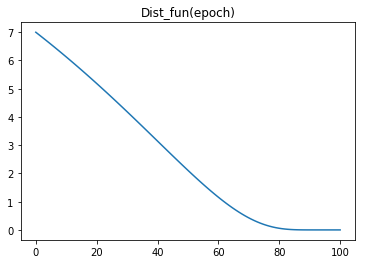

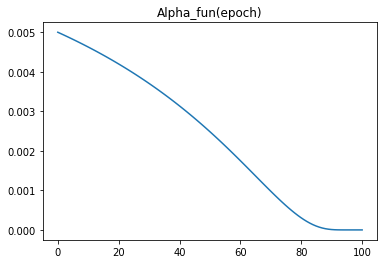

epoch: 0
[-0.0346174   0.10322681 -0.08151433 -0.10979321 -0.04530479 -0.0633494
 -0.07115073 -0.1764825  -0.14702376 -0.10234072]
epoch: 1
[-0.00918961 -0.00797982 -0.03402095 -0.0377236   0.0155731   0.00448822
  0.02098088 -0.0577341  -0.03065874 -0.00133791]
epoch: 2
[ 0.04883073  0.03132221 -0.00990421  0.00271963  0.02172348 -0.03401053
 -0.03696188 -0.01509361 -0.02441947 -0.01562076]
epoch: 3
[ 0.00954616  0.02154092  0.01150105  0.00900228  0.00599613 -0.03146274
 -0.03820801  0.03594536  0.01087863 -0.00313321]
epoch: 4
[ 0.00911166  0.00267884  0.01784877  0.03728498 -0.03503736  0.00249771
 -0.00980275  0.0152303  -0.02010291  0.01100997]
epoch: 5
[-0.02820267 -0.01301797  0.00151777 -0.0038194  -0.02969855  0.06888775
  0.03120703 -0.00755886 -0.00294562  0.00764005]
epoch: 6
[-0.03617859  0.01714645  0.013138    0.00626444  0.0066254   0.02085525
  0.03922924 -0.04149535 -0.02265082  0.02387278]
epoch: 7
[ 0.00347481  0.01599045  0.03442767  0.04334391  0.02081096 -0.0107

epoch: 62
[-0.04901778  0.01727586 -0.01135974  0.00922089 -0.00243775  0.01201814
  0.00772046  0.01805371  0.01480498 -0.00211014]
epoch: 63
[-0.03310584  0.02329618  0.00137611  0.00944935  0.00556953  0.00722544
  0.00418402  0.00805936  0.00092776 -0.01324837]
epoch: 64
[-0.03004749  0.01733452  0.01352629  0.02455804 -0.00174003  0.00462783
  0.00013532  0.00102515 -0.00595578 -0.01016705]
epoch: 65
[-0.02847113  0.01359657  0.00811006  0.01876468 -0.00563113  0.00395883
  0.00054441  0.01193548  0.00081753 -0.00892394]


In [ ]:
ret_network_100_100_1_a005_d10a = learning_short( dane, 
                                                epochs = 100, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

In [ ]:
np.save('Uczenie_ret_network_100_100_1_a005_d10a', ret_network_100_100_1_a005_d10a)
from time import time

Diffrent alphas 

In [ ]:
start = time()
ret_network_50_100_1_a05_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.05),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a05_d7', ret_network_50_100_1_a05_d7)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_50_100_1_a005_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a005_d7', ret_network_50_100_1_a005_d7)
print(str(time() - start) + "s")

In [ ]:
ret_network_50_100_1_a0005_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.0005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a0005_d7', ret_network_50_100_1_a0005_d7)
print(str(time() - start) + "s")

Powtórzenie uczenia

In [ ]:
start = time()
ret_network_50_100_1_a05_d7_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.05),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a05_d7_2', ret_network_50_100_1_a05_d7_2)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_50_100_1_a005_d7_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a005_d7_2', ret_network_50_100_1_a005_d7_2)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_50_100_1_a0005_d7_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.0005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_50_100_1_a0005_d7_2', ret_network_50_100_1_a0005_d7_2)
print(str(time() - start) + "s")

Takie same alfa i dystans ale inna liczba neuronów (36, 64, 100)

In [ ]:
start = time()
ret_network_36_1_a005_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 36, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )
np.save('Uczenie_ret_network_36_1_a0005_d7', ret_network_36_1_a005_d7)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_64_1_a005_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 64, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )
np.save('Uczenie_ret_network_64_1_a0005_d7', ret_network_64_1_a005_d7)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_36_1_a005_d7_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 36, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )
np.save('Uczenie_ret_network_36_1_a0005_d7_2', ret_network_36_1_a005_d7_2)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_64_1_a005_d7_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 64, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )
np.save('Uczenie_ret_network_64_1_a0005_d7_2', ret_network_64_1_a005_d7_2)
print(str(time() - start) + "s")

Rozne d_0

In [ ]:
start = time()
ret_network_100_1_a005_d3 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 3), 
                                              )

np.save('Uczenie_ret_network_100_1_a005_d3', ret_network_100_1_a005_d3)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_100_1_a005_d12 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 12), 
                                              )

np.save('Uczenie_ret_network_100_1_a005_d12', ret_network_100_1_a005_d12)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_100_1_a005_d3_2 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 3), 
                                              )
np.save('Uczenie_ret_network_100_1_a005_d3_2', ret_network_100_1_a005_d3_2)
print(str(time() - start) + "s")

In [ ]:
start = time()
ret_network_100_1_a005_d12 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 12), 
                                              )

np.save('Uczenie_ret_network_100_1_a005_d12', ret_network_100_1_a005_d12)
print(str(time() - start) + "s")

Inny przebieg funkcji (próbne, bo długo się wykonuje)

In [ ]:
alpha_fun = AlphaFun(alpha_0 = 0.005, t = 3)
dist_fun = DecreasingDistFun(d_0 = 7, t = 2)
dist_and_alpha_fun_plots(dist_fun, alpha_fun)

In [ ]:
start = time()
ret_network_100_1_a005_d7 = learning_short( dane, 
                                                epochs = 50, 
                                                neurons = 100, 
                                                wage_init = Close_to_data_wage_init(dane, 0.0001), 
                                                alpha_fun = AlphaFun(alpha_0 = 0.005),
                                                dist_fun = DecreasingDistFun(d_0 = 7), 
                                              )

np.save('Uczenie_ret_network_100_1_a005_d7', ret_network_100_1_a005_d7)
print(str(time() - start) + "s")